### Resolvendo Regressão Linear por Equação Normal

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([10000.0, 20000.0, 30000.0, 40000.0, 50000.0]) #quilometragem
y = np.array([12000.0, 10000.0, 8000.0, 7000.0, 6500.0]) #preco

#Calculando as Medias
x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean(x*y)
x2_mean = np.mean(x**2)

In [7]:
#Aplicar a Equação Normal
theta1= (xy_mean-x_mean*y_mean)/(x2_mean-x_mean**2)
theta0 = y_mean - theta1*x_mean
print(f'theta1={theta1}')
print(f'theta0={theta0}')

theta1=-0.14
theta0=12900.0


In [8]:
# Testando o modelo de regressão linear
quilometragem = float(input('Digite a quilometragem do veículo: '))
preco_veiculo = theta0+theta1*quilometragem
print(f'O preço do veículo é R${preco_veiculo:.2f}')


O preço do veículo é R$8700.00


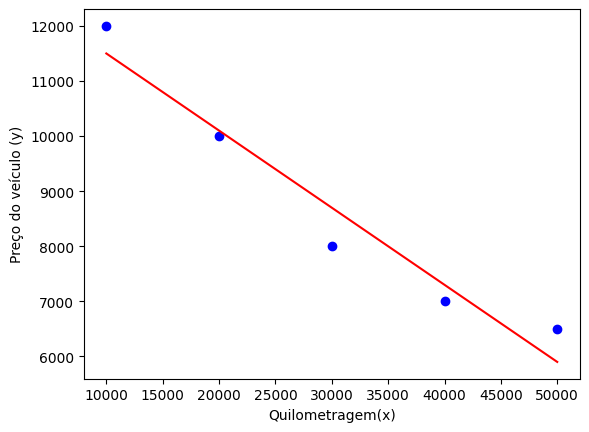

In [9]:
#Visualizando as predições
preco_veiculo = theta0+theta1*x
plt.scatter(x, y, label='Dados reais', color='blue')
plt.plot(x, preco_veiculo, color='red', label='Regressão Linear')
plt.xlabel('Quilometragem(x)')
plt.ylabel('Preço do veículo (y)')
plt.show()

### Equação Normal na Forma Matricial

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([10000.0, 20000.0, 30000.0, 40000.0, 50000.0]) #quilometragem
y = np.array([12000.0, 10000.0, 8000.0, 7000.0, 6500.0]) #preco
# Construir a matriz adicionando uma coluna de 1s para o bias
x_matrix = np.column_stack((np.ones_like(x), x))
y_vector = y.reshape(-1,1)
print(x_matrix)
print(y_vector)

[[1.e+00 1.e+04]
 [1.e+00 2.e+04]
 [1.e+00 3.e+04]
 [1.e+00 4.e+04]
 [1.e+00 5.e+04]]
[[12000.]
 [10000.]
 [ 8000.]
 [ 7000.]
 [ 6500.]]


In [11]:
# Calcular os coeficientes usando a equação normal em forma matricial
theta_best = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y_vector)
theta0 = float(np.float32(theta_best[0]))
theta1 = float(np.float32(theta_best[1]))
print(f'theta0 = {theta0} e theta1 ={theta1:.2f}')

theta0 = 12900.0 e theta1 =-0.14


C:\Users\roger\AppData\Local\Temp\ipykernel_27384\2708828541.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta0 = float(np.float32(theta_best[0]))
C:\Users\roger\AppData\Local\Temp\ipykernel_27384\2708828541.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta1 = float(np.float32(theta_best[1]))


In [12]:
# Testando o modelo de regressão linear
quilometragem = float(input('Digite a quilometragem do veículo'))
preco_veiculo = theta0 + theta1*quilometragem
print(f'O preço estimado do veículo é R$ {preco_veiculo:.2f}')

O preço estimado do veículo é R$ 8000.00


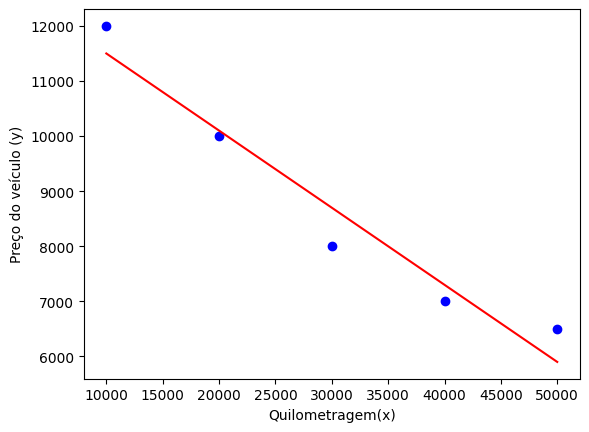

In [13]:
#Visualizando as predições
preco_veiculo = theta0+theta1*x
plt.scatter(x, y, label='Dados reais', color='blue')
plt.plot(x, preco_veiculo, color='red', label='Regressão Linear')
plt.xlabel('Quilometragem(x)')
plt.ylabel('Preço do veículo (y)')
plt.show()

### Regressão Linear usando Gradiente Descendente

In [19]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {
        'Quilometragem':[10000, 20000, 30000, 40000, 50000],
        'Preco':[12000, 10000, 8000, 7000, 6500]
    }
)

#Normalização dos dados
df['Quilometragem'] = df['Quilometragem']/1000
df['Preco'] = df['Preco']/1000

#1. Inicialização dos parâmetros
theta0 = 0
theta1 = 0
alpha = 0.0001 #learning rate
m = df.shape[0]
number_iteractions = 100000
mse_history = list()

for i in range(number_iteractions):
    # 2. Calcular as previsões do modelo
    y_pred = theta0+theta1*df['Quilometragem']

    #3. Calcular o erro
    errors = y_pred - df['Preco']

    #4. Atualizar os coeficientes theta usando as derevidas parciais
    gradient_theta0 = (2/m)*sum(errors)
    gradient_theta1 = (2/m)*sum(errors*df['Quilometragem'])
    theta0 = theta0 - alpha*gradient_theta0
    theta1 = theta1 - alpha*gradient_theta1

    #5. Calcular o custo mse e armazenar para análise
    mse_history.append(np.mean(errors**2))


In [20]:
# Resultados
print(f'Coeficiente theta0: {theta0:.2f}')
print(f'Coeficiente theta1: {theta1:.2f}')
print(f'Erro Médio Quadrático (MSE): {mse_history[number_iteractions-1]:.2f}')

Coeficiente theta0: 12.56
Coeficiente theta1: -0.13
Erro Médio Quadrático (MSE): 0.26


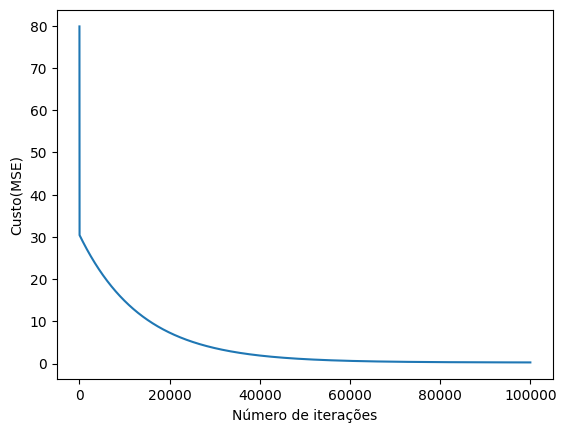

In [21]:
# Visualizar a evolução do custo
plt.plot(range(number_iteractions), mse_history)
plt.xlabel('Número de iterações')
plt.ylabel('Custo(MSE)')
plt.show()

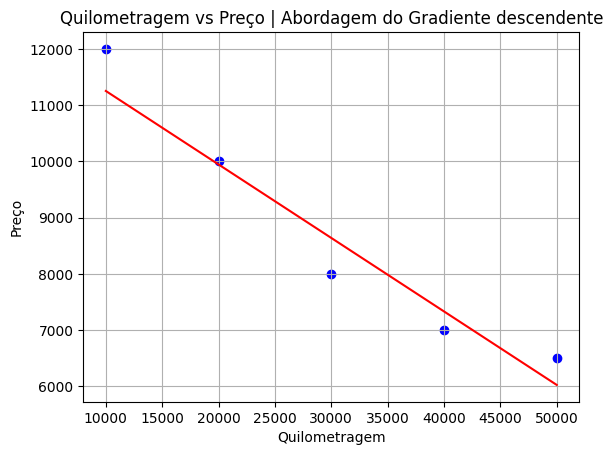

In [22]:
df['Quilometragem'] = df['Quilometragem']*1000
df['Preco'] = df['Preco']*1000

regression_line = [theta0*1000+(theta1*x) for x in df['Quilometragem']]
plt.scatter(df.Quilometragem, df.Preco, color='b')
plt.plot(df.Quilometragem, regression_line, color='r')
plt.title('Quilometragem vs Preço | Abordagem do Gradiente descendente')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.grid()
plt.show()